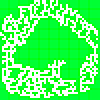

In [5]:
using Images
using DataFrames

img = load("./map/map_310.png")
# img = load("./map/map_001.png")

In [10]:
map="./map/ver02/center_80.PNG"
img = load(map)
img_gray=Gray.(1 .- red.(img))
mat = convert(Array{Float16}, img_gray)
mask = img_gray .> 0
mat_mask = convert(Array{Float16}, img_gray)

50×50 Matrix{Float16}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0     1.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0     

In [82]:
map="./map/ver04/grow_diff_01.png"
# map="./temp/test1.png"

image = load(map)
w, h = size(image)
# Extract the R, G, B matrix
r_matrix = red.(image)
g_matrix = green.(image)
b_matrix = blue.(image)

matrix = fill(Float16(1.0), w, h)

for i in 1:w
    for j in 1:h
        # Đoạn code bạn muốn thực hiện cho từng cặp giá trị i và j
        if r_matrix[i, j] == 1.0 &&  g_matrix[i, j] == 1.0 &&  b_matrix[i, j] == 1.0
            matrix[i, j] = 0.0
        else
            luminance = 0.299 * r_matrix[i, j] + 0.587 * g_matrix[i, j] + 0.114 * b_matrix[i, j]
            matrix[i, j] = 1 - luminance
        end
    end
end
# Tìm giá trị lớn nhất trong ma trận
max_value = maximum(matrix)

# Chia từng giá trị trong ma trận cho giá trị lớn nhất
normalized_matrix = matrix / max_value
normalized_matrix

50×50 Matrix{Float16}:
 0.5527  0.5527  0.2915  0.2915  0.2915  …  0.2915  0.2915  0.2915  0.2915
 0.2915  0.5527  0.2915  0.2915  0.2915     0.2915  0.2915  0.2915  0.2915
 0.2915  0.2915  0.2915  0.2915  0.2915     0.2915  0.2915  0.2915  0.2915
 0.552   0.2915  0.2915  0.2915  0.567      0.2915  0.2915  0.2915  0.5044
 0.5693  0.2915  0.2915  0.2915  0.5854     0.2915  0.2915  0.2915  0.2915
 0.552   0.552   0.2915  0.2915  1.0     …  0.2915  0.2915  0.2915  0.5044
 0.5527  0.5527  0.2915  1.0     1.0        0.5044  0.2915  0.2915  0.5044
 0.5527  0.5527  1.0     1.0     1.0        0.5044  0.2915  0.2915  0.2915
 0.552   1.0     1.0     0.0     0.0        0.5044  0.5044  0.2915  0.2915
 1.0     1.0     0.0     0.5854  0.0        0.3726  0.3726  0.2915  0.2915
 ⋮                                       ⋱                          
 1.0     0.5854  0.0     0.0     0.0        0.0     1.0     0.5527  0.5527
 1.0     0.5527  0.5854  0.0     0.0        1.0     1.0     0.5527  0.5527
 1.0    

In [100]:

tiger_catch = rand(0:0.03:0.9)
leopard_catch = rand(0:0.03:0.9)

string(tiger_catch, "_", leopard_catch)

"0.15_0.42"

In [89]:
rand(0:0.03:0.9)

0.51

In [16]:
green_count = 0

for y = 1:height
    for x = 1:width
        if img[y, x] != RGB(1, 1, 1)
            green_count += 1
        end
    end
end

println("Tổng số pixel có màu xanh là $green_count")


Tổng số pixel có màu xanh là 1750


In [19]:
function get_first_food_energy(map_path)
    img = load(map_path)
    height, width = size(img)
    green_count = 0.0

    for y = 1:height
        for x = 1:width
            if img[y, x] != RGB(1, 1, 1)
                green_count += 1
            end
        end
    end
    return green_count
end

get_first_food_energy (generic function with 1 method)

In [20]:
map_path="./map/map_310.png"
df = DataFrame(food_energy=[get_first_food_energy(map_path)],
count_boar=[500], count_tiger=[25], count_leopard=[25],
born_leopard=[0],born_tiger=[0],born_boar=[0],
)


Row,food_energy,count_boar,count_tiger,count_leopard,born_leopard,born_tiger,born_boar
,Float64,Int64,Int64,Int64,Int64,Int64,Int64
1,1750.0,500,25,25,0,0,0


In [ ]:
using FileIO
using Path

In [3]:


map_folder = "./map/ver01/"
output_folder = "data/map_ver1/"

# Lấy danh sách tất cả các file trong thư mục map_folder
files = readdir(map_folder)

# Lặp qua từng file
for file in files
    # Lấy tên file và bỏ extension
    file_name = splitext(file)[1]
    
    # Tạo đường dẫn thư mục output
    output_path = joinpath(output_folder, file_name)
    
    # Kiểm tra nếu thư mục chưa tồn tại thì tạo mới
    if !isdir(output_path)
        mkpath(output_path)
        println(joinpath(output_folder, file_name, "hello.csv"))
    end
end


data/map_ver1/coord_60\hello.csv
data/map_ver1/coord_65\hello.csv
data/map_ver1/coord_70\hello.csv
data/map_ver1/coord_75\hello.csv
data/map_ver1/coord_80\hello.csv
data/map_ver1/coord_85\hello.csv
data/map_ver1/coord_90\hello.csv
data/map_ver1/coord_95\hello.csv
data/map_ver1/edge_60\hello.csv
data/map_ver1/edge_65\hello.csv
data/map_ver1/edge_70\hello.csv
data/map_ver1/edge_75\hello.csv
data/map_ver1/edge_80\hello.csv
data/map_ver1/edge_85\hello.csv
data/map_ver1/edge_90\hello.csv
data/map_ver1/edge_95\hello.csv
data/map_ver1/rand_60\hello.csv
data/map_ver1/rand_65\hello.csv
data/map_ver1/rand_70\hello.csv
data/map_ver1/rand_75\hello.csv
data/map_ver1/rand_80\hello.csv
data/map_ver1/rand_85\hello.csv
data/map_ver1/rand_90\hello.csv
data/map_ver1/rand_95\hello.csv


In [108]:
Int(0.75*100)

75

In [109]:
const DEFAULT_MAX_ENERGY= Dict(		   :boar => 1.0,     :tiger => 1.0,      :leopard => 1.0) 
const DEFAULT_ENERGY_TRANSFERT = Dict( :boar => 0.3,    :tiger => 0.5,      :leopard => 0.2)
const DEFAULT_ENERGY_CONSUME = Dict(   :boar => 0.018,   :tiger => 0.03,    :leopard => 0.012)
const DEFAULT_REPRODUCE_PROBA= Dict(   :boar => 0.0036,    :tiger => 0.0015,    :leopard => 0.0017)
const MAX_OFFSPRING =      Dict(       :boar => 12,       :tiger => 6  ,      :leopard => 4)
const DEFAULT_REPRODUCE_ENERGY= Dict(  :boar => 0.6,     :tiger => 0.6,      :leopard => 0.6)
const DEFAULT_CATCH_PROB = Dict(         	 	 	     :tiger => 0.6,     :leopard => 0.35)
const DEFAULT_LIFESPAN = Dict(  	   :boar =>(12*365), :tiger => (15*365), :leopard => (14*365))
const DEFAULT_GROW_SPEED = 0.01

0.01

In [113]:
parameter_dict = Dict(
    :energy_consum => DEFAULT_ENERGY_CONSUME,
    :max_energy => DEFAULT_MAX_ENERGY,
    :lifespan => DEFAULT_LIFESPAN,
    :proba_reproduce => DEFAULT_REPRODUCE_PROBA,
    :max_offsprings => MAX_OFFSPRING,
    :energy_reproduce => DEFAULT_REPRODUCE_ENERGY,
    :grow_speed => DEFAULT_GROW_SPEED,
    :energy_transfert => DEFAULT_ENERGY_TRANSFERT,
    :catch_prob => DEFAULT_CATCH_PROB,
)


Dict{Symbol, Any} with 10 entries:
  :max_energy       => Dict(:tiger=>1.0, :leopard=>1.0, :boar=>1.0)
  :max_food         => 1
  :proba_reproduce  => Dict(:tiger=>0.0015, :leopard=>0.0017, :boar=>0.0036)
  :max_offsprings   => Dict(:tiger=>6, :leopard=>4, :boar=>12)
  :grow_speed       => 0.01
  :lifespan         => Dict(:tiger=>5475, :leopard=>5110, :boar=>4380)
  :catch_prob       => Dict(:tiger=>0.6, :leopard=>0.35)
  :energy_transfert => Dict(:tiger=>0.5, :leopard=>0.2, :boar=>0.3)
  :energy_consum    => Dict(:tiger=>0.03, :leopard=>0.012, :boar=>0.018)
  :energy_reproduce => Dict(:tiger=>0.6, :leopard=>0.6, :boar=>0.6)

In [148]:
new_para_list = [
    Dict("energy_consum_boar_0.036" => Dict(:energy_consum  => Dict(   :boar => 0.036,   :tiger => 0.03,    :leopard => 0.012))),
    Dict("energy_consum_tiger_0.06" => Dict(:energy_consum  => Dict(   :boar => 0.018,   :tiger => 0.06,    :leopard => 0.012))),
    
    Dict("energy_consum_leopard_0.024" => Dict(:energy_consum  => Dict(   :boar => 0.018,   :tiger => 0.03,    :leopard => 0.024))),
]

3-element Vector{Dict{String, Dict{Symbol, Dict{Symbol, Float64}}}}:
 Dict("energy_consum_boar_0.036" => Dict(:energy_consum => Dict(:tiger => 0.03, :leopard => 0.012, :boar => 0.036)))
 Dict("energy_consum_tiger_0.06" => Dict(:energy_consum => Dict(:tiger => 0.06, :leopard => 0.012, :boar => 0.018)))
 Dict("energy_consum_leopard_0.024" => Dict(:energy_consum => Dict(:tiger => 0.03, :leopard => 0.024, :boar => 0.018)))

In [147]:
for new_para in new_para_list
    name_para = collect(keys(new_para))[1]

    new_value_name = collect(keys(new_para[name_para]))[1]
    
    parameter_dict[new_value_name] = new_para[name_para][new_value_name]
    print(new_value_name, "\n")
end

energy_consum
energy_consum
energy_consum


In [135]:
keys(new_para_list[1])

KeySet for a Dict{String, Dict{Symbol, Dict{Symbol, Float64}}} with 1 entry. Keys:
  "energy_consum_boar_0.036"

In [149]:
0.0036*2

0.0072